# Emo-DB Feature Engineering
## 6/26/24

In [1]:
# Package imports

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wave
import soundfile as sf
from glob import glob
import pickle

import librosa 
import librosa.display
import IPython.display as ipd

from itertools import cycle

In [29]:
# # A csv file that has the labels for each audio file

# # Path to audio files
# audio_path = r'C:\Users\sylas\OneDrive\emo-db-project\wav'

# # Mapping of emotion codes from filenames to emotion descriptions
# emotion_map = {
#     'W': 'anger',    # Wut
#     'L': 'boredom',  # Langeweile
#     'E': 'anxiety',  # Ekel
#     'A': 'happiness', # Freude
#     'T': 'sadness',  # Traurigkeit
#     'F': 'disgust',  # Furcht
#     'N': 'neutral'   # Neutral
# }

# # Mapping of speaker numbers to their details
# speaker_map = {
#     '03': 'male, 31 years old',
#     '08': 'female, 34 years',
#     '09': 'female, 21 years',
#     '10': 'male, 32 years',
#     '11': 'male, 26 years',
#     '12': 'male, 30 years',
#     '13': 'female, 32 years',
#     '14': 'female, 35 years',
#     '15': 'male, 25 years',
#     '16': 'female, 31 years'
# }

# # Prepare to collect data
# data = []

# # Iterate over each file in the directory
# for filename in os.listdir(audio_path):
#     if filename.endswith('.wav'):
#         # Extract components from the filename
#         speaker = filename[:2]
#         emotion_code = filename[5]

#         # Map codes to descriptions
#         emotion = emotion_map.get(emotion_code, 'Unknown')
#         speaker_info = speaker_map.get(speaker, 'Unknown')

#         # Append the details to the data list
#         data.append([filename, speaker_info, emotion])

# # Create a DataFrame
# df = pd.DataFrame(data, columns=['Filename', 'Speaker Info', 'Emotion'])

# # Save to CSV
# csv_path = os.path.join(audio_path, 'audio_labels.csv')
# df.to_csv(csv_path, index=False)

# print(f'CSV file has been created at {csv_path}')


In [30]:
audio_files = glob(r'C:\Users\sylas\OneDrive\emo-db-project\wav\*.wav')

In [31]:
#Plays audio file

ipd.Audio(audio_files[0])

In [32]:
#Reads in audio file

y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [0.0007019  0.00247192 0.00332642 0.00213623 0.00036621 0.00021362
 0.00161743 0.00250244 0.00213623 0.00152588]
shape y: (44100,)
sr: 22050


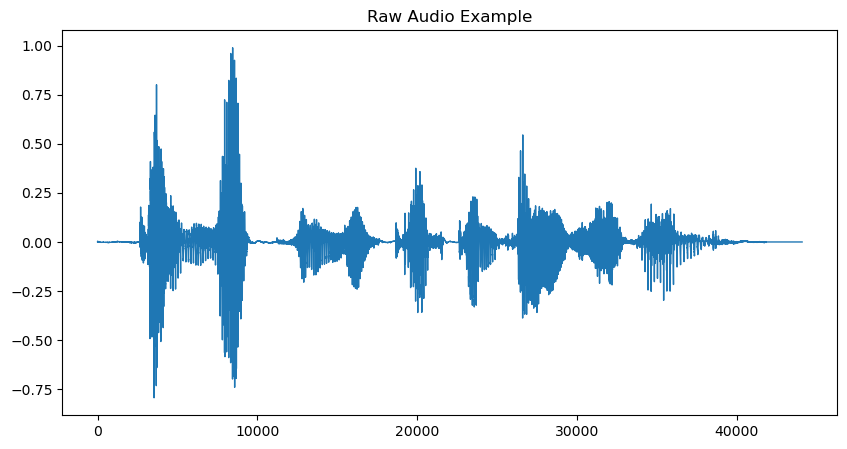

In [33]:
pd.Series(y).plot(figsize=(10, 5),
lw =1,
title = 'Raw Audio Example',)
plt;

## Data Cleaning

In [34]:
# Iterate over each file in the directory
directory = r'C:\Users\sylas\OneDrive\emo-db-project\wav'

for file_name in os.listdir(directory):
    if file_name.endswith('.wav'):
        file_path = os.path.join(directory, file_name)
        with sf.SoundFile(file_path) as sound_file:
            print(f'Filename: {file_name}')
            print('Sample rate:', sound_file.samplerate)
            print('Channels:', sound_file.channels)
            print('Subtype:', sound_file.subtype)


Filename: 03a01Fa.wav
Sample rate: 22050
Channels: 1
Subtype: PCM_16
Filename: 03a01Nc.wav
Sample rate: 22050
Channels: 1
Subtype: PCM_16
Filename: 03a01Wa.wav
Sample rate: 22050
Channels: 1
Subtype: PCM_16
Filename: 03a02Fc.wav
Sample rate: 22050
Channels: 1
Subtype: PCM_16
Filename: 03a02Nc.wav
Sample rate: 22050
Channels: 1
Subtype: PCM_16
Filename: 03a02Ta.wav
Sample rate: 22050
Channels: 1
Subtype: PCM_16
Filename: 03a02Wb.wav
Sample rate: 22050
Channels: 1
Subtype: PCM_16
Filename: 03a02Wc.wav
Sample rate: 22050
Channels: 1
Subtype: PCM_16
Filename: 03a04Ad.wav
Sample rate: 22050
Channels: 1
Subtype: PCM_16
Filename: 03a04Fd.wav
Sample rate: 22050
Channels: 1
Subtype: PCM_16
Filename: 03a04Lc.wav
Sample rate: 22050
Channels: 1
Subtype: PCM_16
Filename: 03a04Nc.wav
Sample rate: 22050
Channels: 1
Subtype: PCM_16
Filename: 03a04Ta.wav
Sample rate: 22050
Channels: 1
Subtype: PCM_16
Filename: 03a04Wc.wav
Sample rate: 22050
Channels: 1
Subtype: PCM_16
Filename: 03a05Aa.wav
Sample rate:

In [35]:
# Checking for corrupted files
for file_name in os.listdir(directory):
    if file_name.endswith('.wav'):
        file_path = os.path.join(directory, file_name)
        try:
            with sf.SoundFile(file_path) as sound_file:
                print(file_name, "is OK")
        except Exception as e:
            print(file_name, "is corrupted or unreadable:", str(e))


03a01Fa.wav is OK
03a01Nc.wav is OK
03a01Wa.wav is OK
03a02Fc.wav is OK
03a02Nc.wav is OK
03a02Ta.wav is OK
03a02Wb.wav is OK
03a02Wc.wav is OK
03a04Ad.wav is OK
03a04Fd.wav is OK
03a04Lc.wav is OK
03a04Nc.wav is OK
03a04Ta.wav is OK
03a04Wc.wav is OK
03a05Aa.wav is OK
03a05Fc.wav is OK
03a05Nd.wav is OK
03a05Tc.wav is OK
03a05Wa.wav is OK
03a05Wb.wav is OK
03a07Fa.wav is OK
03a07Fb.wav is OK
03a07La.wav is OK
03a07Nc.wav is OK
03a07Wc.wav is OK
03b01Fa.wav is OK
03b01Lb.wav is OK
03b01Nb.wav is OK
03b01Td.wav is OK
03b01Wa.wav is OK
03b01Wc.wav is OK
03b02Aa.wav is OK
03b02La.wav is OK
03b02Na.wav is OK
03b02Tb.wav is OK
03b02Wb.wav is OK
03b03Nb.wav is OK
03b03Tc.wav is OK
03b03Wc.wav is OK
03b09La.wav is OK
03b09Nc.wav is OK
03b09Tc.wav is OK
03b09Wa.wav is OK
03b10Ab.wav is OK
03b10Ec.wav is OK
03b10Na.wav is OK
03b10Nc.wav is OK
03b10Wb.wav is OK
03b10Wc.wav is OK
08a01Ab.wav is OK
08a01Fd.wav is OK
08a01Lc.wav is OK
08a01Na.wav is OK
08a01Wa.wav is OK
08a01Wc.wav is OK
08a02Ab.wa

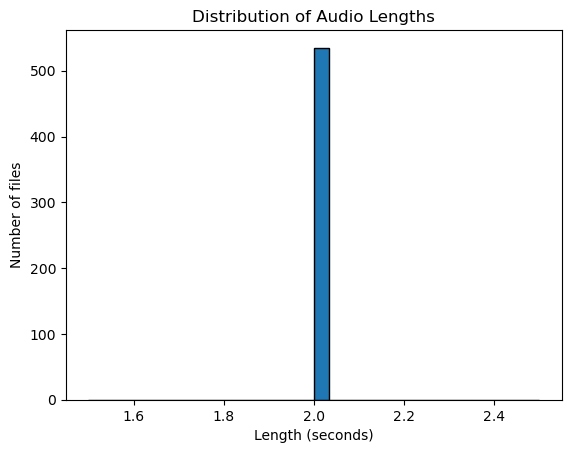

In [36]:
# Distribution of audio lengths

lengths = []
for file_name in os.listdir(directory):
    if file_name.endswith('.wav'):
        file_path = os.path.join(directory, file_name)
        audio, sr = librosa.load(file_path, sr=None)
        duration = librosa.get_duration(y=audio, sr=sr)
        lengths.append(duration)

# Plotting
plt.hist(lengths, bins=30, edgecolor='black')
plt.title('Distribution of Audio Lengths')
plt.xlabel('Length (seconds)')
plt.ylabel('Number of files')
plt.show()

In [37]:
## Calculating desired audio length
lengths_samples = []  # To store the number of samples of each file
lengths_seconds = []  # To store the duration in seconds of each file

# Load all audio files and calculate lengths
for file_name in os.listdir(directory):
    if file_name.endswith('.wav'):
        file_path = os.path.join(directory, file_name)
        audio, sr = librosa.load(file_path, sr=None)
        original_length = len(audio)
        duration_seconds = original_length / sr
        
        lengths_samples.append(original_length)
        lengths_seconds.append(duration_seconds)

# Convert lists to numpy arrays for easier manipulation
lengths_samples = np.array(lengths_samples)
lengths_seconds = np.array(lengths_seconds)

# Initial analysis to determine mean and standard deviation
mean_samples = np.mean(lengths_samples)
std_samples = np.std(lengths_samples)
mean_seconds = np.mean(lengths_seconds)
std_seconds = np.std(lengths_seconds)

# Define outliers as being more than 2 standard deviations from the mean
outlier_samples = (lengths_samples < mean_samples - 2 * std_samples) | (lengths_samples > mean_samples + 2 * std_samples)
outlier_seconds = (lengths_seconds < mean_seconds - 2 * std_seconds) | (lengths_seconds > mean_seconds + 2 * std_seconds)

# Filter out the outliers
filtered_samples = lengths_samples[~outlier_samples]
filtered_seconds = lengths_seconds[~outlier_seconds]

# Recalculate the averages without outliers
average_length_samples_filtered = np.mean(filtered_samples)
average_length_seconds_filtered = np.mean(filtered_seconds)

print(f"Average length in samples without outliers: {average_length_samples_filtered}")
print(f"Average length in seconds without outliers: {average_length_seconds_filtered}")


Average length in samples without outliers: 44100.0
Average length in seconds without outliers: 2.0


In [38]:
import librosa
import numpy as np
import os
import soundfile as sf

# Define the directory where the audio files are stored
directory = r'C:\Users\sylas\OneDrive\emo-db-project\wav'

# Desired length in seconds
desired_length = 2.0

# Sampling rate (assuming 22050 Hz, but you can change this if different)
sampling_rate = 22050

# Define the desired number of samples (2 seconds * sampling rate)
desired_samples = int(desired_length * sampling_rate)

# Process each audio file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.wav'):
        file_path = os.path.join(directory, filename)
        # Load the audio file
        audio, sr = librosa.load(file_path, sr=sampling_rate)

        if len(audio) > desired_samples:
            # Trim the audio if it's longer than the desired length
            audio = audio[:desired_samples]
        elif len(audio) < desired_samples:
            # Pad with zeros (silence) if it's shorter than the desired length
            padding = desired_samples - len(audio)
            audio = np.pad(audio, (0, padding), mode='constant')

        # Save the processed audio file using soundfile.write
        sf.write(file_path, audio, sr)

print("All files processed and standardized to 2 seconds.")


All files processed and standardized to 2 seconds.


## Feature Extraction

### MFCC Feature Engineering

In [39]:

import os
import pandas as pd
import numpy as np
import librosa

# Function to extract features and return as a flat list
def extract_features(file_path):
    try:
        audio, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13, n_fft=2048, hop_length=512)
       
        # Transpose mfccs to have time frames as rows and features as columns
        mfccs = mfccs.T  # shape: (t, n_mfcc)
        
        return mfccs
    except Exception as e:
        print(f"Failed to process {file_path}: {str(e)}")
        return None


# List to hold all data
data = []

# Iterate over each file listed in the CSV
for _, row in labels_df.iterrows():
    file_name = row['Filename']
    emotion = row['Emotion']
    file_path = os.path.join(directory, file_name)
   
    if os.path.exists(file_path):
        chroma_stft = extract_features(file_path)
        if chroma_stft is not None:
            # Create a list of dictionaries where each dictionary represents a row of data
            for frame in chroma_stft:
                frame_dict = {'Emotion': emotion}
                for i, mfcc_coefficient in enumerate(frame):
                    frame_dict[f'MFCC_{i+1}'] = mfcc_coefficient
                data.append(frame_dict)
    else:
        print(f"File not found: {file_path}")

# Proceed only if data is not empty
if data:
    # Convert list of dictionaries to DataFrame
    df = pd.DataFrame(data)

    # Save to CSV
    df.to_csv('MFCCs_features.csv', index=False)
    print("Feature extraction complete and data saved to CSV.")
else:
    print("No data processed. Check file paths and file availability.")



Feature extraction complete and data saved to CSV.


### Mel Spec FE

In [40]:

import os
import pandas as pd
import numpy as np
import librosa

# Function to extract features and return as a flat list
def extract_features(file_path):
    try:
        audio, sr = librosa.load(file_path, sr=None)
        mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=512)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max).flatten()
        # Transpose mfccs to have time frames as rows and features as columns
        mel_spec = mel_spec.T  # shape: (t, n_mfcc)
        
        return mel_spec
    except Exception as e:
        print(f"Failed to process {file_path}: {str(e)}")
        return None


# List to hold all data
data = []

# Iterate over each file listed in the CSV
for _, row in labels_df.iterrows():
    file_name = row['Filename']
    emotion = row['Emotion']
    file_path = os.path.join(directory, file_name)
   
    if os.path.exists(file_path):
        mel_spec = extract_features(file_path)
        if mel_spec is not None:
            # Create a list of dictionaries where each dictionary represents a row of data
            for frame in mel_spec:
                frame_dict = {'Emotion': emotion}
                for i, mel_spec_coefficient in enumerate(frame):
                    frame_dict[f'MelSpec_{i+1}'] = mel_spec_coefficient
                data.append(frame_dict)
    else:
        print(f"File not found: {file_path}")

# Proceed only if data is not empty
if data:
    # Convert list of dictionaries to DataFrame
    df = pd.DataFrame(data)

    # Save to CSV
    df.to_csv('Mel_Spec_features.csv', index=False)
    print("Feature extraction complete and data saved to CSV.")
else:
    print("No data processed. Check file paths and file availability.")



Feature extraction complete and data saved to CSV.


### Chroma_STFT FE

In [41]:
import os
import pandas as pd
import numpy as np
import librosa

# Function to extract features and return as a flat list
def extract_features(file_path):
    try:
        audio, sr = librosa.load(file_path, sr=None)
        chroma_stft = librosa.feature.chroma_stft(y=audio, sr=sr, n_fft=2048, hop_length=512)
        # Transpose mfccs to have time frames as rows and features as columns
        chroma_stft = chroma_stft.T  # shape: (t, n_mfcc)
        
        return chroma_stft
    except Exception as e:
        print(f"Failed to process {file_path}: {str(e)}")
        return None


# List to hold all data
data = []

# Iterate over each file listed in the CSV
for _, row in labels_df.iterrows():
    file_name = row['Filename']
    emotion = row['Emotion']
    file_path = os.path.join(directory, file_name)
   
    if os.path.exists(file_path):
        chroma_stft = extract_features(file_path)
        if chroma_stft is not None:
            # Create a list of dictionaries where each dictionary represents a row of data
            for frame in chroma_stft:
                frame_dict = {'Emotion': emotion}
                for i, chr_coefficient in enumerate(frame):
                    frame_dict[f'Chroma{i+1}'] = chr_coefficient
                data.append(frame_dict)
    else:
        print(f"File not found: {file_path}")

# Proceed only if data is not empty
if data:
    # Convert list of dictionaries to DataFrame
    df = pd.DataFrame(data)

    # Save to CSV
    df.to_csv('Chroma_STFT_features.csv', index=False)
    print("Feature extraction complete and data saved to CSV.")
else:
    print("No data processed. Check file paths and file availability.")



Feature extraction complete and data saved to CSV.
